In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
X = df.drop('Outcome', axis='columns')
y = df.Outcome
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [7]:
y = np.where(y == 0, -1, 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train_2D = X_train[:, :2]
X_test_2D = X_test[:, :2]


svm_sklearn_2D = SVC(kernel="linear", C=1.0)
svm_sklearn_2D.fit(X_train_2D, y_train)

SVC(kernel='linear')

In [26]:
class CustomSVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y == 0, -1, 1)  # Convert labels to -1, 1
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

In [27]:
svm_custom_2D = CustomSVM()
svm_custom_2D.fit(X_train_2D, y_train)

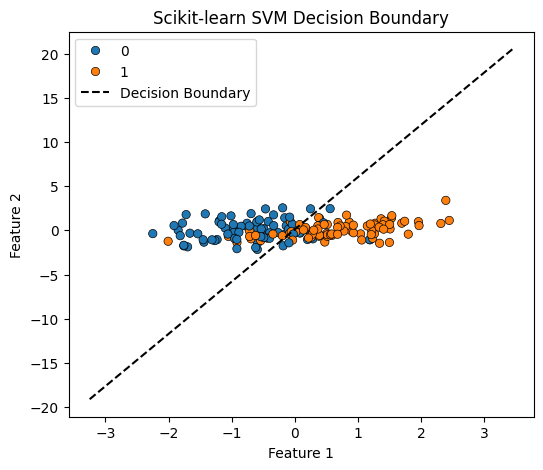

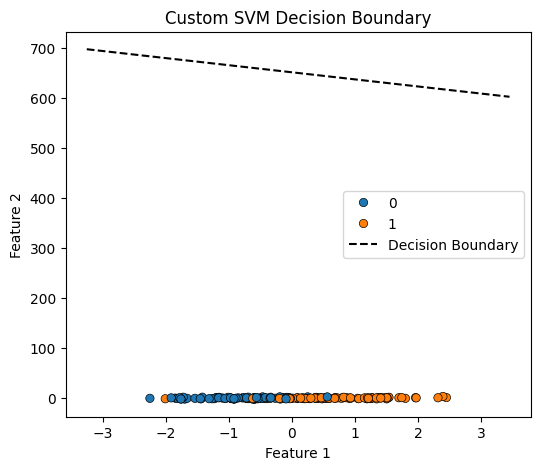

In [ ]:
def plot_decision_boundary_line(model, X, y, title, custom=False):
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, edgecolor='k')
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

    if custom:
        w = model.w
        b = model.b
    else:
        w = model.coef_[0]
        b = model.intercept_[0]

    y_min = -(w[0] / w[1]) * x_min - (b / w[1])
    y_max = -(w[0] / w[1]) * x_max - (b / w[1])

    plt.plot([x_min, x_max], [y_min, y_max], 'k--', label="Decision Boundary")
    
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.legend()
    plt.show()

# Plot both SVM models
plot_decision_boundary_line(svm_sklearn_2D, X_train_2D, y_train, "Scikit-learn SVM Decision Boundary")
plot_decision_boundary_line(svm_custom_2D, X_train_2D, y_train, "Custom SVM Decision Boundary", custom=True)


In [14]:
svm_sklearn = SVC(kernel="linear", C=1.0)
svm_sklearn.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
y_pred_sklearn = svm_sklearn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn) * 100
print(f"Scikit-learn SVM Accuracy: {accuracy_sklearn:.2f}%")

Scikit-learn SVM Accuracy: 75.97%


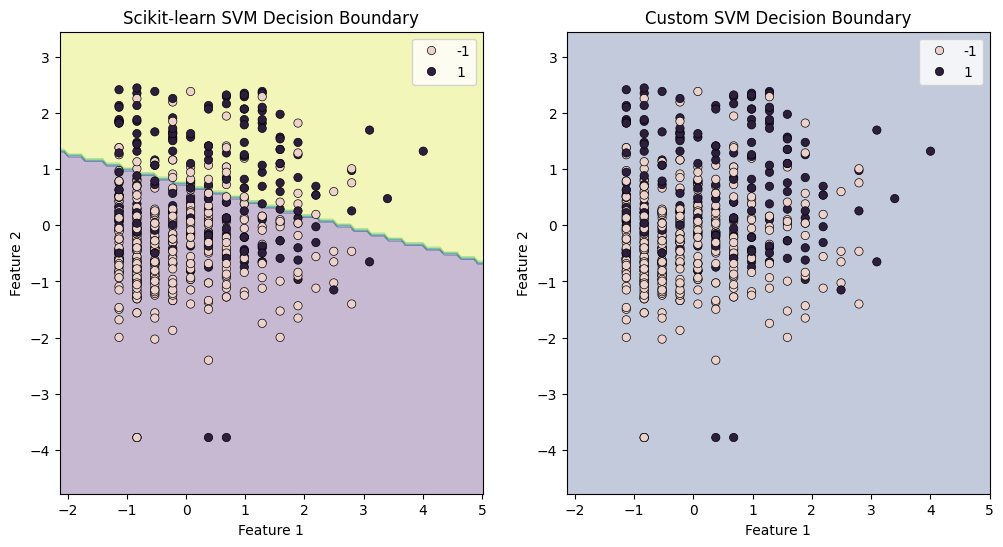

In [21]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')


svm_scratch_2D = SVM_Scratch()
svm_scratch_2D.fit(X_train_2D, y_train)


svm_sklearn_2D = SVC(kernel="linear", C=1.0)
svm_sklearn_2D.fit(X_train_2D, y_train)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(svm_sklearn_2D, X_train_2D, y_train, "Scikit-learn SVM Decision Boundary")

plt.subplot(1, 2, 2)
plot_decision_boundary(svm_scratch_2D, X_train_2D, y_train, "Custom SVM Decision Boundary")

plt.show()

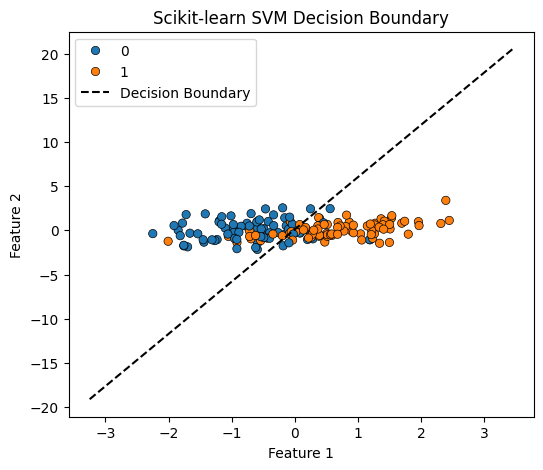

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a simple linearly separable dataset with 2 features
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Scikit-learn's SVM
svm_sklearn = SVC(kernel="linear", C=1.0)
svm_sklearn.fit(X_train, y_train)

# --- Custom SVM Class ---
class CustomSVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y == 0, -1, 1)  # Convert labels to -1, 1
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# Train Custom SVM
svm_custom = CustomSVM()
svm_custom.fit(X_train, y_train)

# --- Function to Plot Decision Boundary as a Line ---
def plot_decision_boundary_line(model, X, y, title, custom=False):
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, edgecolor='k')
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

    if custom:
        w = model.w
        b = model.b
    else:
        w = model.coef_[0]
        b = model.intercept_[0]

    # Compute decision boundary line: x2 = -(w0/w1) * x1 - (b/w1)
    y_min = -(w[0] / w[1]) * x_min - (b / w[1])
    y_max = -(w[0] / w[1]) * x_max - (b / w[1])

    plt.plot([x_min, x_max], [y_min, y_max], 'k--', label="Decision Boundary")
    
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.legend()
    plt.show()

# --- Plot Both SVM Models ---
plot_decision_boundary_line(svm_sklearn, X_train, y_train, "Scikit-learn SVM Decision Boundary")
# plot_decision_boundary_line(svm_custom, X_train, y_train, "Custom SVM Decision Boundary", custom=True)
